Perfil de estudantes
[Database](https://www.kaggle.com/datasets/scarecrow2020/tech-students-profile-prediction)

Análise Exploratória



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline

In [ ]:
#!unzip '/content/estudante.zip'

In [ ]:
#Importar biblioteca pandas
import pandas as pd
data = pd.read_csv('/content/dataset-tortuga.csv')

In [ ]:
#Informações do database
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

In [ ]:
data.shape

(20000, 16)

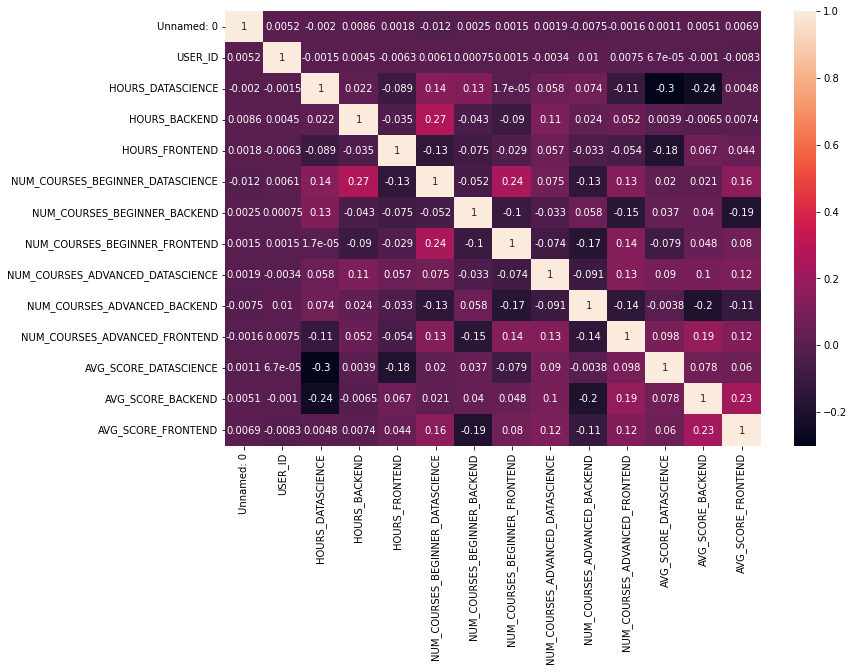

In [ ]:
#Gerar a correlação usando heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

In [ ]:
#Removendo colunas
data = data.drop(columns=["Unnamed: 0", "NAME", "USER_ID","NUM_COURSES_ADVANCED_DATASCIENCE","NUM_COURSES_ADVANCED_FRONTEND","PROFILE"])

In [ ]:
#Amostra do database
data


,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_BACKEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
0,7.0,39.0,29.0,2.0,4.0,0.0,5.0,84.0,74.0,NaN
1,32.0,0.0,44.0,2.0,0.0,0.0,5.0,67.0,45.0,NaN
2,45.0,0.0,59.0,0.0,5.0,4.0,4.0,NaN,54.0,47.0
3,36.0,19.0,28.0,0.0,5.0,7.0,5.0,NaN,71.0,89.0
4,61.0,78.0,38.0,6.0,11.0,0.0,3.0,66.0,85.0,NaN
...,...,...,...,...,...,...,...,...,...,...
19995,0.0,44.0,42.0,8.0,4.0,7.0,3.0,74.0,73.0,93.0
19996,0.0,85.0,63.0,3.0,5.0,0.0,7.0,50.0,83.0,94.0
19997,32.0,50.0,22.0,0.0,4.0,0.0,2.0,61.0,81.0,75.0
19998,0.0,96.0,69.0,3.0,3.0,3.0,7.0,64.0,68.0,68.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


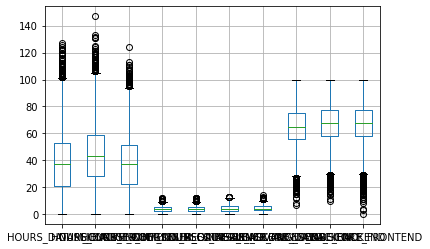

In [ ]:
#Verificando se existe a presença de outliers 
data.boxplot()

In [ ]:
#Verificando informações do database
data.describe()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_BACKEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
count,19986.000000,19947.000000,19984.000000,19974.000000,19982.000000,19961.000000,19992.000000,19780.000000,19916.000000,19832.000000
mean,37.565296,43.552263,36.936599,3.698608,3.715144,4.048294,4.344338,65.070324,67.234535,67.130748
std,22.394805,22.387518,20.590381,2.001647,2.101863,2.296000,2.161569,13.950559,14.214591,14.446830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,10.000000,0.000000
25%,21.000000,28.000000,22.000000,2.000000,2.000000,2.000000,3.000000,56.000000,58.000000,58.000000
50%,37.000000,43.000000,37.000000,4.000000,4.000000,4.000000,4.000000,65.000000,68.000000,68.000000
75%,53.000000,59.000000,51.000000,5.000000,5.000000,6.000000,6.000000,75.000000,77.000000,77.000000
max,127.000000,147.000000,124.000000,12.000000,12.000000,13.000000,14.000000,100.000000,100.000000,100.000000


In [ ]:
#Remoção de dados ausentes
db = data.dropna()
db.isna().sum()

HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_BACKEND        0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
dtype: int64

In [ ]:
#Verificando o resultado da remoção de dados ausentes
db.shape

(19367, 10)

K-Means



In [ ]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#Obter os valores dos atributos. Obtem os valores de cada variável num formato de array
data_atrib = db.values

In [ ]:
#Imprimir array X [Valores de entrada]
data_atrib

array([[39., 52., 34., ..., 69., 65., 73.],
       [28., 44., 16., ..., 41., 40., 76.],
       [74., 36., 41., ..., 52., 77., 66.],
       ...,
       [32., 50., 22., ..., 61., 81., 75.],
       [ 0., 96., 69., ..., 64., 68., 68.],
       [51., 24., 36., ..., 63., 61., 87.]])

In [ ]:
#Definindo uma amostra do database
db, amostra = train_test_split(data_atrib, train_size = 0.25)

In [ ]:
db.shape

(4841, 10)

In [ ]:
#Aplicando PCA para diminuir a dimencionalidade atráves da semelhança entre as variáveis
pca = PCA(n_components=3).fit_transform(db)

In [ ]:
#Iniciando o modelo K-Means
#Criação de range de 6 elementos
k_range = range(1,7)
k_range

range(1, 7)

In [ ]:
#Aplicando o modelo K-means para os valores de K para escolher qual irá ser o resultado melhor
k_means_var = [KMeans(n_clusters= k).fit(pca)for k in k_range]

Text(0.5, 1.0, 'Variância')

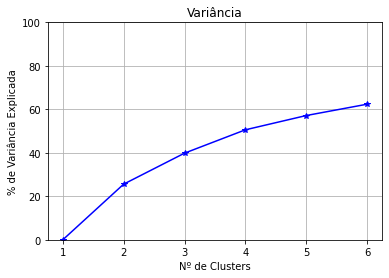

In [ ]:
#Método do cotovelo [Elbow]
#Ajuste de centróide
centroids = [X.cluster_centers_ for X in k_means_var]

#Calcular distância de cada ponto de dados
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

#Soma dos quadrados das distância dentre
sum_quad_cluster_out = [sum(d**2) for d in dist]

#Soma total dos quadrados
sum_total = sum(pdist(pca)**2)/pca.shape[0]

#Soma dos quadrados entre clusters
sum_quad_cluster_in = sum_total - sum_quad_cluster_out

#Plotar Curva Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, sum_quad_cluster_in/sum_total*100, 'b*-')
ax.set_ylim((0, 100))
plt.grid(True)
plt.xlabel('Nº de Clusters')
plt.ylabel('% de Variância Explicada')
plt.title('Variância')

#Quantidade da variancia que consigo explicar

In [ ]:
#Visualização do modelo
#x_min, x_max = pca[:,0].min() - 5, pca[:,0].max()-1
#y_min, y_max = pca[:,1].min() + 1, pca[:,1].max()+5
#xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
#Z = modelo_p1.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)

In [ ]:
#plt.figure(1)
#plt.clf()
#plt.imshow(Z,
           #interpolation = 'nearest',
           #extent = (xx.min(), xx.max(),yy.min(),yy.max()),
           #cmap = plt.cm.Paired,
           #aspect = 'auto',
           #origin = 'lower')

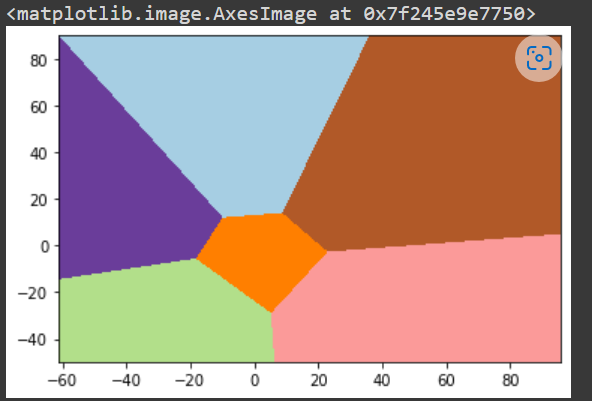

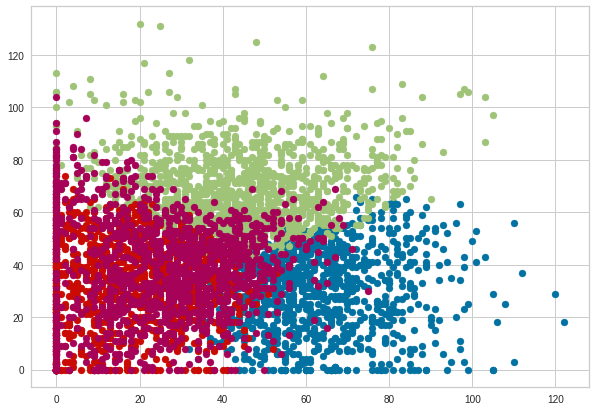

In [ ]:
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from matplotlib import pyplot
fig= plt.figure(figsize=(10,7))
#Definição do modelo
model = KMeans(n_clusters=4)
model.fit(db)
yhat = model.predict(db)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(db[row_ix, 0], db[row_ix, 1])
pyplot.show()

In [ ]:
#Criando um modelo
modelo_p1 = KMeans(n_clusters=6)
modelo_p1.fit(pca)

KMeans(n_clusters=6)

In [ ]:
#Silhoette score - Avaliação da clusterização
#?silhouette_score
labels = modelo_p1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

#pca = 2 silhoete = 3

0.24610494894774512

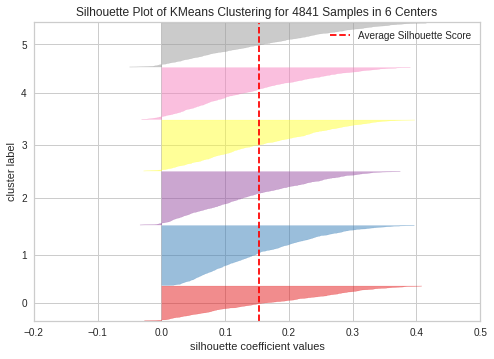

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
modelo_p1 = KMeans(n_clusters = 6, random_state=42)

sil_visualizer = SilhouetteVisualizer(modelo_p1)
sil_visualizer.fit(db)    
sil_visualizer.show()

In [ ]:
modelo_p2 = KMeans(n_clusters=4)
modelo_p2.fit(pca)

KMeans(n_clusters=4)

In [ ]:
labels = modelo_p2.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.2424144242366986

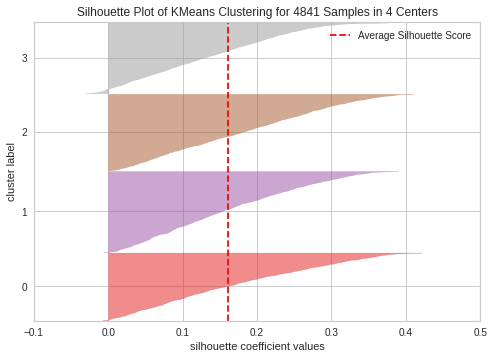

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
modelo_p2 = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(modelo_p2)
sil_visualizer.fit(db)    
sil_visualizer.show()

In [ ]:
modelo_p3 = KMeans(n_clusters=3)
modelo_p3.fit(pca)

KMeans(n_clusters=3)

In [ ]:
labels = modelo_p3.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.23266361294428534

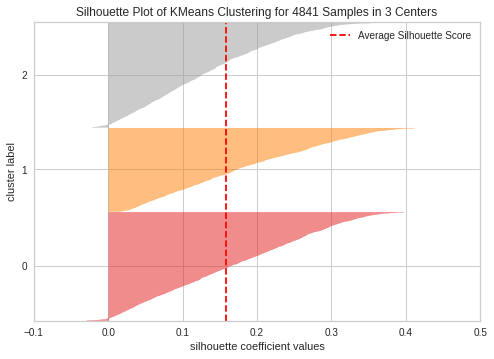

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
modelo_p3 = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(modelo_p3)
sil_visualizer.fit(db)    
sil_visualizer.show()

In [ ]:
modelo_p4 = KMeans(n_clusters=2)
modelo_p4.fit(pca)

KMeans(n_clusters=2)

In [ ]:
labels = modelo_p4.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.23919835157515096

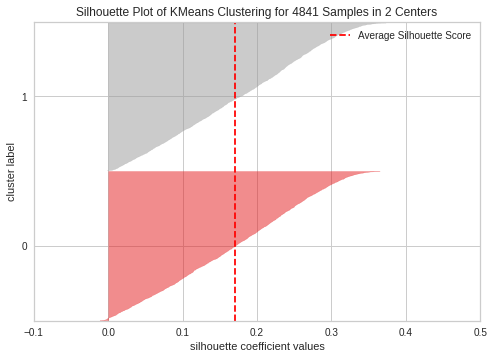

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
modelo_p4 = KMeans(n_clusters = 2, random_state=42)

sil_visualizer = SilhouetteVisualizer(modelo_p4)
sil_visualizer.fit(db)    
sil_visualizer.show()

In [ ]:
#colunas = ['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE','NUM_COURSES_BEGINNER_BACKEND',
#           'NUM_COURSES_BEGINNER_FRONTEND','NUM_COURSES_ADVANCED_BACKEND', 'AVG_SCORE_DATASCIENCE',
#           'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'cluster']

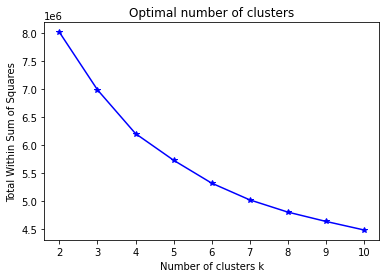

In [ ]:
#Applicação 2
wss = []

K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(db)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

DBSCAM

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

clustering = DBSCAN(eps=3, min_samples=6).fit(db)
#Storing the labels formed by the DBSCAN
labels = clustering.labels_

In [ ]:
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[clustering.core_sample_indices_] = True

In [ ]:
# Number of clusters in labels, ignoring noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 2)
n_noise_ = list(labels).count(-1)

In [ ]:
print('Estimativa do número de clusters: %d' % n_clusters_)
#Pontos são discrepantes que não estão associados a nenhum cluster denso.
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 4841


In [ ]:
#Sem cluster
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(db, labels))

ValueError: ignored